<a href="https://colab.research.google.com/github/Faisal-Shahrani/COVID-19-Detection/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing tensorflow**

In [ ]:
!pip install tensorflow

#Bulding the Mini project 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 
from tensorflow.keras import layers
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths 
import matplotlib.pyplot as plt 
import numpy as np 
import argparse
import cv2
import os 
import sys
import tensorflow as tf 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/datasets/covid project'
print(dataset_path)

/content/drive/MyDrive/datasets/covid project


In [ ]:
sys.path.append('/content/drive/MyDrive/datasets/covid project')

In [ ]:
%cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
import visual_lib
from visual_lib import *

data, labels = load_rgb_data_cv(dataset_path, 244, shuffle=True)  
print(data.shape)
print(labels.shape)

Loading images...
Loading covid
we will load [ 102 ] files from [ covid ] class ...
Loading normal
we will load [ 102 ] files from [ normal ] class ...
File loading completed.
(204, 244, 244, 3)
(204,)


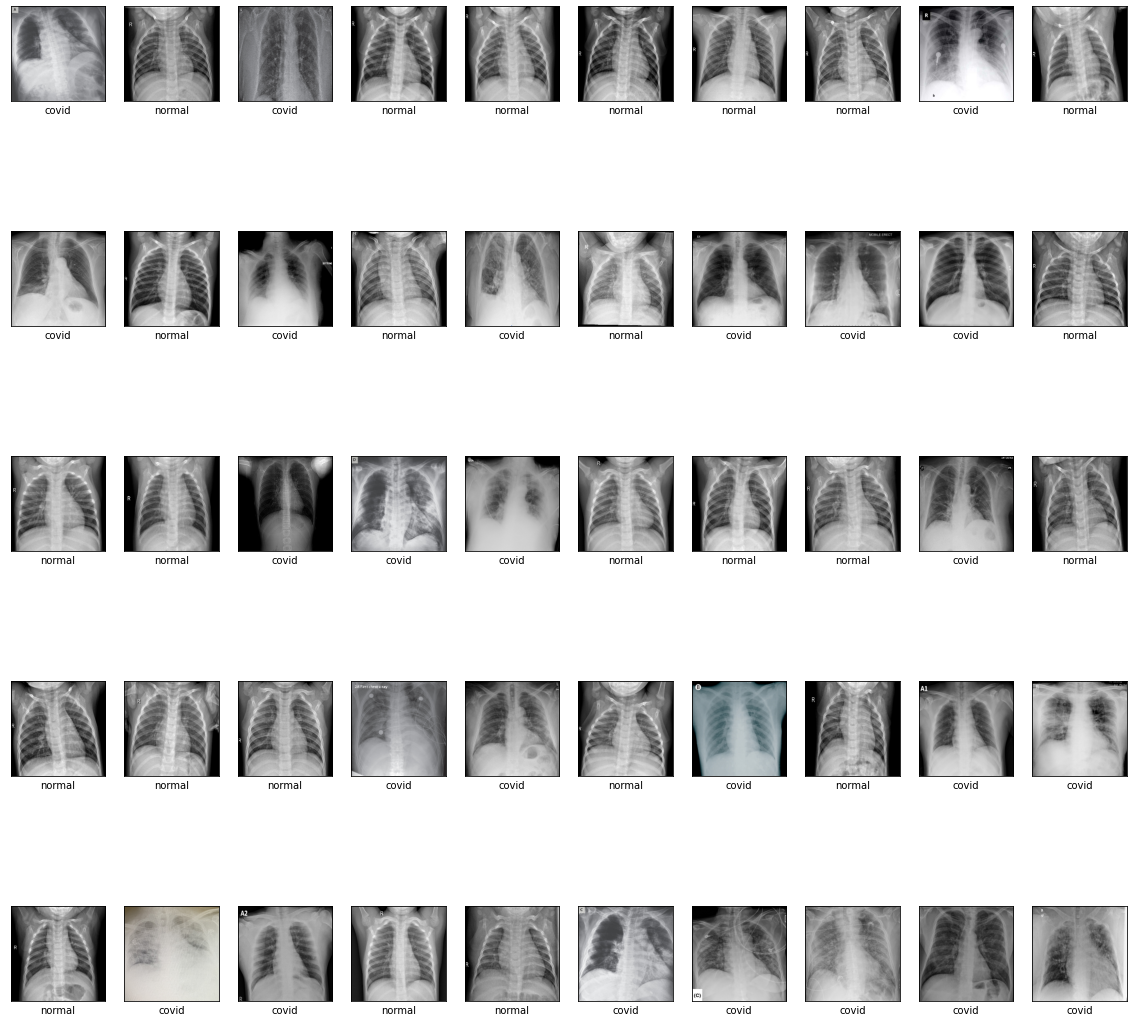

In [ ]:
visual_lib.plot_sample_from_dataset(data, labels, rows=5, colums=10, width=20, height=20 )

Label = covid
image shape:  (244, 244, 3)


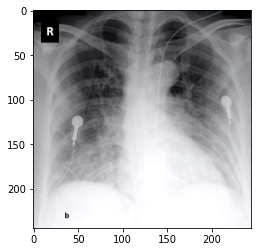

In [ ]:
visual_lib.display_image(data, labels, index= 8)

In [ ]:
visual_lib.display_dataset_shape(data, labels)

Shape of images:  (204, 244, 244, 3)
Shape of labels:  (204,)


In [ ]:
visual_lib.display_dataset_folders(dataset_path)

['covid', 'normal']


In [ ]:
stats = visual_lib.get_data_distribution(dataset_path, output_file= '/content/drive/MyDrive/datasets/data.csv')

Loading images...
Loading covid
we will load [ 102 ] files from [ covid ] class ...
Loading normal
we will load [ 102 ] files from [ normal ] class ...
Stats collected and saved in . /content/drive/MyDrive/datasets/data.csv


2  classes found in the dataset
Images of the whole dataset have an average size of  470.7527401960784
sizes of class [ covid ] have an average size of  384.4448529411764
sizes of class [ normal ] have an average size of  557.0606274509802


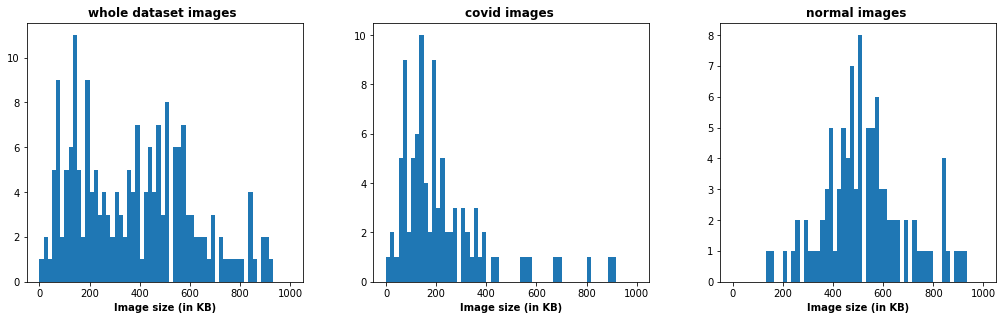

In [ ]:
visual_lib.plot_dataset_distribution(stats, num_cols=4, width=15, height=5, histogram_bins=60, histogram_range=[0, 1000])

In [ ]:
%cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
!ls

 covid19-vgg16.h5   data.csv	  result_plot.jpg
'covid project'     __pycache__   visual_lib.py


In [ ]:
data, labels = visual_lib.load_rgb_data(dataset_path, 244, shuffle=True)

data= visual_lib.normalize_data(data)
print('labels:', labels[:5])
lb = LabelBinarizer()
binary_labels = lb.fit_transform(labels)
print("binary_labels after Binarizer: ", binary_labels[:5])
hot_encoded_labels = to_categorical(binary_labels)
print("hot_encoded_labels after one-hot encoding: ", hot_encoded_labels[:5])
#need to explain hot_encoded

Loading images...
['covid', 'normal']
Loading covid
we will load [ 102 ] files from [ covid ] class ...
Loading normal
we will load [ 102 ] files from [ normal ] class ...
File loading completed.
normalize data
labels: ['covid' 'covid' 'normal' 'normal' 'normal']
binary_labels after Binarizer:  [[0]
 [0]
 [1]
 [1]
 [1]]
hot_encoded_labels after one-hot encoding:  [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


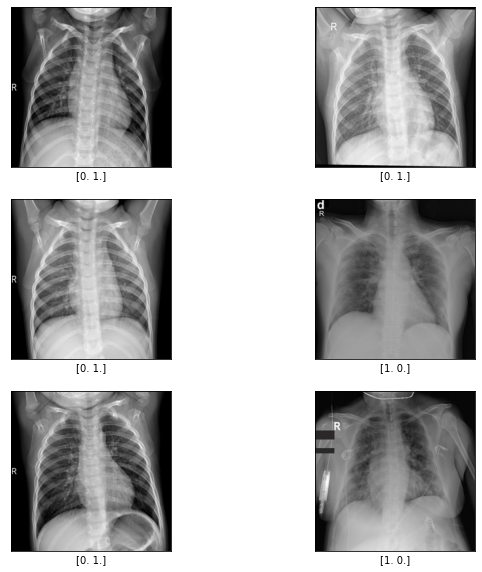

Shape of images:  (163, 244, 244, 3)
Shape of labels:  (163, 2)
Shape of images:  (41, 244, 244, 3)
Shape of labels:  (41, 2)


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, hot_encoded_labels, test_size=0.2, stratify = hot_encoded_labels, random_state=42)
visual_lib.plot_sample_from_dataset(trainX, trainY, rows = 3, colums=2, width=10,height=10)
display_dataset_shape(trainX, trainY)
display_dataset_shape(testX,testY)

trainAug = ImageDataGenerator(rotation_range=15, fill_mode='nearest')

In [ ]:
#learning rate and batch size , EPOCHS to making work again 
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [ ]:
baseModel = VGG16(weights="imagenet", include_top = False, input_tensor=Input(shape=(244,244,3)))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name = "flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)
              

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [ ]:
print("[INFO] compiling model..")
opt = Adam(learning_rate=INIT_LR, decay = INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer= opt, metrics= ["accuracy"])

[INFO] compiling model..


In [ ]:
print("[INFO] compiling model..")
H = model.fit(trainAug.flow(trainX, trainY,batch_size=BS),
              steps_per_epoch=len(trainX)//BS,
              validation_data=(testX, testY),
              validation_steps=len(testX)//BS,
              epochs=EPOCHS)

[INFO] compiling model..
Epoch 1/25
20/20 [==============================] - 26s 684ms/step - loss: 0.7564 - accuracy: 0.5419 - val_loss: 0.6096 - val_accuracy: 0.9756
Epoch 2/25
20/20 [==============================] - 4s 186ms/step - loss: 0.5927 - accuracy: 0.7226 - val_loss: 0.5402 - val_accuracy: 0.9756
Epoch 3/25
20/20 [==============================] - 4s 188ms/step - loss: 0.5248 - accuracy: 0.7677 - val_loss: 0.4819 - val_accuracy: 0.9756
Epoch 4/25
20/20 [==============================] - 4s 185ms/step - loss: 0.4553 - accuracy: 0.8903 - val_loss: 0.4150 - val_accuracy: 0.9756
Epoch 5/25
20/20 [==============================] - 4s 185ms/step - loss: 0.4076 - accuracy: 0.9032 - val_loss: 0.3625 - val_accuracy: 0.9756
Epoch 6/25
20/20 [==============================] - 4s 184ms/step - loss: 0.3612 - accuracy: 0.9355 - val_loss: 0.3151 - val_accuracy: 0.9756
Epoch 7/25
20/20 [==============================] - 4s 184ms/step - loss: 0.3089 - accuracy: 0.9097 - val_loss: 0.2771 - v

In [ ]:
model.save("covid19-vgg16.h5")

In [ ]:
print("loading model....")
model = tf.keras.models.load_model("covid19-vgg16.h5")

loading model....


In [ ]:
print("[INFO] evaluating network...")
model.evaluate(testX, verbose= 1)
predIdxs = model.predict(testX, verbose= 1)

[INFO] evaluating network...
2/2 [==============================] - 13s 21ms/step


Label = [0. 1.]
image shape:  (244, 244, 3)


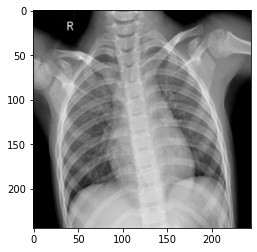

In [ ]:
index = 3
image = testX[index]
visual_lib.display_image(testX, testY, index)

In [ ]:
image = visual_lib.reshape_image_for_neural_network_input(image)

predProbabilities = model.predict(image, verbose=1)
print("true label: ", testY[index])
print("predicted label: ", predProbabilities)

flatten the image
image.shape (178608, 1)
reshape the image to be similar to the input feature vector
image.shape (1, 244, 244, 3)
1/1 [==============================] - 1s 1s/step
true label:  [0. 1.]
predicted label:  [[0.02426748 0.97573256]]


In [ ]:
predIdxs = np.argmax(predProbabilities, axis = 1)
print("predicated label", predIdxs)

predicated label [1]


In [ ]:
predProbabilities = model.predict(testX, verbose=1)
predIdxs = np.argmax(predProbabilities, axis = 1)
print(classification_report(testY.argmax(axis = 1), predIdxs, target_names = lb.classes_))

2/2 [==============================] - 0s 274ms/step
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        20
      normal       1.00      1.00      1.00        21

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1])/total
sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
specificity = cm[1,1]/(cm[1,0] + cm[1,1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:4f}".format(sensitivity))
print("specificity: {:4f}".format(specificity))

[[20  0]
 [ 0 21]]
acc: 1.0000
sensitivity: 1.000000
specificity: 1.000000


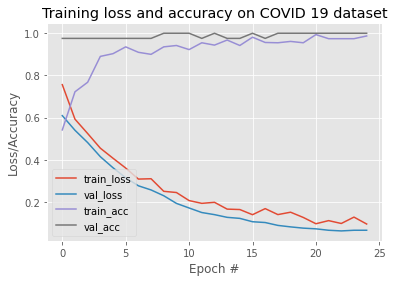

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label = "val_acc")
plt.title("Training loss and accuracy on COVID 19 dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig("/content/drive/MyDrive/datasets/result_plot.jpg")